In [3]:
# Chargement des packages nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des données

In [32]:
X_train = pd.read_csv("X_train_resampled.csv", index_col=0)
y_train = pd.read_csv("y_train_resampled.csv", index_col=0)
y_train = y_train['grav']

197021    1
197795    1
248965    1
245305    1
169024    1
         ..
185469    4
12389     4
216401    4
99487     4
191781    4
Name: grav, Length: 262296, dtype: int64

In [ ]:
X_test = pd.read_csv("X_test.csv", index_col=0)
y_test = pd.read_csv("y_test.csv", index_col=0)
y_test = y_test['grav']

# Application du meilleur modèle

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score, f1_score, accuracy_score

model = GradientBoostingClassifier(n_estimators=700,
                                   min_samples_split=11,
                                   min_samples_leaf=18,
                                   max_depth=6,
                                   learning_rate=0.05)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Mesure performance modèle
print('Accuracy score test :', accuracy_score(y_test, y_pred))
print('Accuracy score train :', accuracy_score(y_train, y_pred_train))
print('----------')
print('Recall test :', recall_score(y_test, y_pred, average='macro'))
print('Recall train :', recall_score(y_train, y_pred_train, average='macro'))
print('----------')
print('f1 score test :', f1_score(y_test, y_pred, average='macro'))
print('f1 score train :', f1_score(y_train, y_pred_train, average='macro'))


Accuracy score test : 0.5961723217689668
Accuracy score train : 0.6475966084118706
----------
Recall test : 0.554732366105769
Recall train : 0.6475966084118706
----------
f1 score test : 0.48039011263264886
f1 score train : 0.6423642807608049


In [36]:
# Importation du modèle optimisé
import pickle
model_gb = pickle.load(open("best_model_GB_resampled.pkl", "rb"))

In [38]:
# Vérification de la bonne importation du modèle
y_pred2 = model_gb.predict(X_test)
y_pred2_train = model_gb.predict(X_train)

# Mesure performance modèle
print('Accuracy score test :', accuracy_score(y_test, y_pred2))
print('Accuracy score train :', accuracy_score(y_train, y_pred2_train))
print('----------')
print('Recall test :', recall_score(y_test, y_pred2, average='macro'))
print('Recall train :', recall_score(y_train, y_pred2_train, average='macro'))
print('----------')
print('f1 score test :', f1_score(y_test, y_pred2, average='macro'))
print('f1 score train :', f1_score(y_train, y_pred2_train, average='macro'))

Accuracy score test : 0.5961723217689668
Accuracy score train : 0.6475966084118706
----------
Recall test : 0.554732366105769
Recall train : 0.6475966084118706
----------
f1 score test : 0.4803870611511257
f1 score train : 0.6423642807608049


Prédiction,1,2,3,4
Réalité,,,,
1,21959,1311,1695,4087
2,85,904,524,146
3,815,2554,4240,1923
4,6030,2094,5217,11991


              precision    recall  f1-score   support

           1       0.76      0.76      0.76     29052
           2       0.13      0.54      0.21      1659
           3       0.36      0.44      0.40      9532
           4       0.66      0.47      0.55     25332

    accuracy                           0.60     65575
   macro avg       0.48      0.55      0.48     65575
weighted avg       0.65      0.60      0.61     65575



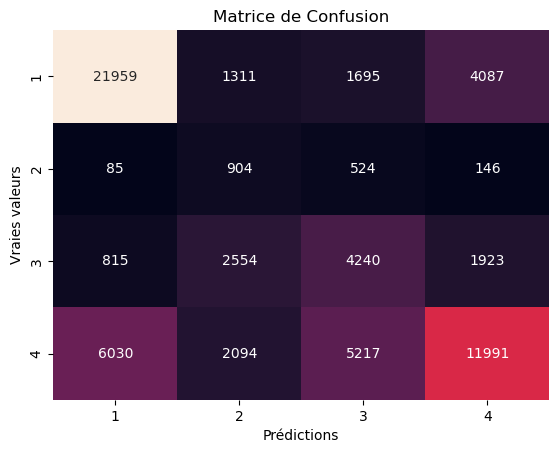

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_matrix = confusion_matrix(y_test, y_pred)

display(pd.crosstab(y_test.values, y_pred, rownames=['Réalité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show();


# Interprétabilité du modèle

L'interprétabilité = la mesure dans laquelle un être humain peut prédire de manière cohérente le résultat d'un modèle.

Plus l'interprétabilité d'un modèle de Machine Learning est élevée, plus il est facile pour un individu de comprendre le raisonnement derrière certaines décisions ou prédictions. Un modèle est plus facilement interprétable qu'un autre si ses décisions sont plus faciles à comprendre pour un humain.

Les mesures de performances sont importantes, mais elles n'expliquent pas les décisions prédictives d'un modèle. Au fil du temps, les performances peuvent diminuer car le modèle n'est plus optimal par rapport à divers changements de distribution des variables explicatives. Il est donc important de comprendre ce qui pousse un modèle à prendre certaines décisions afin d'identifier les features auxquels un modèle serait très sensible et dont il faut surveiller la distribution au fil du temps.

Parfois un modèle peut réaliser de bonnes performances, mais après déploiement, on peut se rendre compte qu'il ne correspond pas à ce qu'on attendait. Il peut avoir une différence d'interprétation entre ce qu'on demande au modèle et sa compréhension de notre formaulation.

Les **trois aspects** les plus importants de l'interprétation des modèles sont expliqués par les questions suivantes:

**Qu'est-ce qui motive les prédictions du modèle ?** Interroger notre modèle et découvrir les interactions cachées entre les différentes features pour avoir une idée de celles qui pourraient être les plus importantes dans les prises de décisions du modèle. Cela permet de <ins>garantir l'équité du modèle</ins>.

**Pourquoi le modèle a-t-il pris une certaine décision ?** Valider et de justifier pourquoi certaines caractéristiques clés ont été à l'origine de certaines décisions prises par un modèle lors des prédictions. Cela permet de <ins>garantir la responsabilité et la fiabilité du modèle</ins>.

**Comment pouvons-nous faire confiance aux prédictions du modèle ?** Evaluer et valider la façon dont un modèle prend des décisions pour tout point de données. Ainsi, on peut démontrer et expliquer facilement que le modèle fonctionne comme prévu. Cela permet de <ins>garantir la transparence du modèle</ins>.


Deux types d'interprétabilité : l'interprétabilité ***intrinsèque*** et l'interprétabilité ***post hoc***.

**Interprétabilité intrinsèque :** Propre aux modèles eux-mêmes et découle de leur structure simple et transparente. Des exemples incluent les régressions linéaires (où les coefficients sont directement interprétables), les arbres de décision (où l'on peut suivre les branches pour comprendre les décisions), et les modèles basés sur des règles. Ces modèles sont conçus pour être compréhensibles par les humains sans nécessiter de méthodes d'analyse supplémentaires.

**Interprétabilité post hoc :** Pour les modèles complexes, qui ne sont pas naturellement transparents, et nécessite des techniques supplémentaires pour expliquer leurs prédictions après coup. Les méthodes post hoc incluent LIME (qui génère des explications locales en ajustant des modèles simples autour d'une instance spécifique) et ***SHAP (qui utilise des concepts de théorie des jeux pour attribuer à chaque feature une valeur d'importance)***. Ces techniques peuvent être appliquées à n'importe quel modèle de machine learning sans se baser sur la structure interne du modèle.


In [42]:
# Importation du package nécessaire
import shap

In [44]:
# Importation du package nécessaire
import shap

In [46]:
# Représentation du résultats des accidents suivant l'ensemble d'entrainement
y_train.value_counts()
print('Indenmes = ', y_train.value_counts()[1], ' soit ', np.round(y_train.value_counts(normalize=True)[1]*100, 1), '%')
print('Blessé léger = ', y_train.value_counts()[4], ' soit ', np.round(y_train.value_counts(normalize=True)[4]*100, 1), '%')
print('Blessé grave = ', y_train.value_counts()[3], ' soit ', np.round(y_train.value_counts(normalize=True)[3]*100, 1), '%')
print('Tué = ', y_train.value_counts()[2], ' soit ', np.round(y_train.value_counts(normalize=True)[2]*100, 1), '%')

Indenmes =  65574  soit  25.0 %
Blessé léger =  65574  soit  25.0 %
Blessé grave =  65574  soit  25.0 %
Tué =  65574  soit  25.0 %


In [48]:
# Représentation du résultats des accidents suivant l'ensemble de test
y_test.value_counts()
print('Indenmes = ', y_test.value_counts()[1], ' soit ', np.round(y_test.value_counts(normalize=True)[1]*100, 1), '%')
print('Blessé léger = ', y_test.value_counts()[4], ' soit ', np.round(y_test.value_counts(normalize=True)[4]*100, 1), '%')
print('Blessé grave = ', y_test.value_counts()[3], ' soit ', np.round(y_test.value_counts(normalize=True)[3]*100, 1), '%')
print('Tué = ', y_test.value_counts()[2], ' soit ', np.round(y_test.value_counts(normalize=True)[2]*100, 1), '%')

Indenmes =  29052  soit  44.3 %
Blessé léger =  25332  soit  38.6 %
Blessé grave =  9532  soit  14.5 %
Tué =  1659  soit  2.5 %


## Interprétation globale du modèle

In [50]:
# Analyse des valeurs shap
#explainer = shap.TreeExplainer(model_boost)

#shap_values = explainer.shap_values(X_test)

# NE fonctionne plus pour XGBoost :
#InvalidModelError: GradientBoostingClassifier is only supported for binary classification right now!

In [52]:
# 262296 ou 65575 lignes de données -> beaucoup trop long (calcul > 12h)
# On réduit l'échantillon pour exploiter et voir l'importance des variables


In [64]:
# On instancie l'explainer
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train, 100))

In [66]:
# On calcule les shap values
shap_values = explainer.shap_values(shap.sample(X_test, 100))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [26:27<00:00, 15.88s/it]


In [68]:
# On remanie les dimensions des shap_values (inversion des shapes du fait du multiclasses)
shap_values = [shap_values[:,:,i] for i in range(4)]

In [70]:
# On vérifie le shape pour chacune de nos classes
shap_values[0].shape, shap_values[1].shape, shap_values[2].shape, shap_values[3].shape, 

((100, 115), (100, 115), (100, 115), (100, 115))

In [72]:
print(f"Valeur Shapley de Référence moyenne par Classe : {explainer.expected_value}")

Valeur Shapley de Référence moyenne par Classe : [0.30963805 0.22888348 0.23143835 0.23004012]


In [74]:
# On crée deux variables pour identifier le nom de nos features et de nos classes
feature_names = X_test.columns.to_list()
target_names = ["indemne", "tué", "blessé_hospitalisé", "blessé_léger"]
print(feature_names)

['sexe', 'agg', 'Ceinture', 'Casque', 'Dispositif enfants', 'Gilet réfléchissant', 'Airbag', 'Gants', 'Autre equipement', 'conducteur', 'passager_avant', 'passager_arrière', 'trajet_pro', 'trajet_perso', 'trajet_autre', 'catv_velo', 'catv_moto', 'catv_voiture', 'catv_utilitaire', 'catv_veh_remorque', 'catv_PL', 'catv_tracteur', 'catv_tram_train', 'catv_quad_3roues', 'catv_autre_inconnu', 'catv_bus_car', 'catv_EDP', 'choc_avant', 'choc_arriere', 'choc_cote', 'choc_tonneaux', 'choc_aucun', 'manv_diverse', 'manv_droite', 'manv_gauche', 'manv_pas_chang_dir', 'manv_meme_sens_file', 'manv_inconnue', 'chaussee_bidirectionnelle', 'voie_reservee', 'chaussee_seche', 'int_aucune', 'int_branches', 'int_autre', 'atm_normal', 'senc_1', 'senc_2', 'senc_3', 'obs_1', 'obs_2', 'obs_3', 'obs_4', 'obs_5', 'obs_6', 'obs_7', 'obs_8', 'obs_9', 'obs_10', 'obs_11', 'obs_12', 'obs_13', 'obs_14', 'obs_15', 'obs_16', 'obs_17', 'obsm_1', 'obsm_2', 'obsm_4', 'obsm_5', 'obsm_6', 'obsm_9', 'motor_1', 'motor_2', 'moto

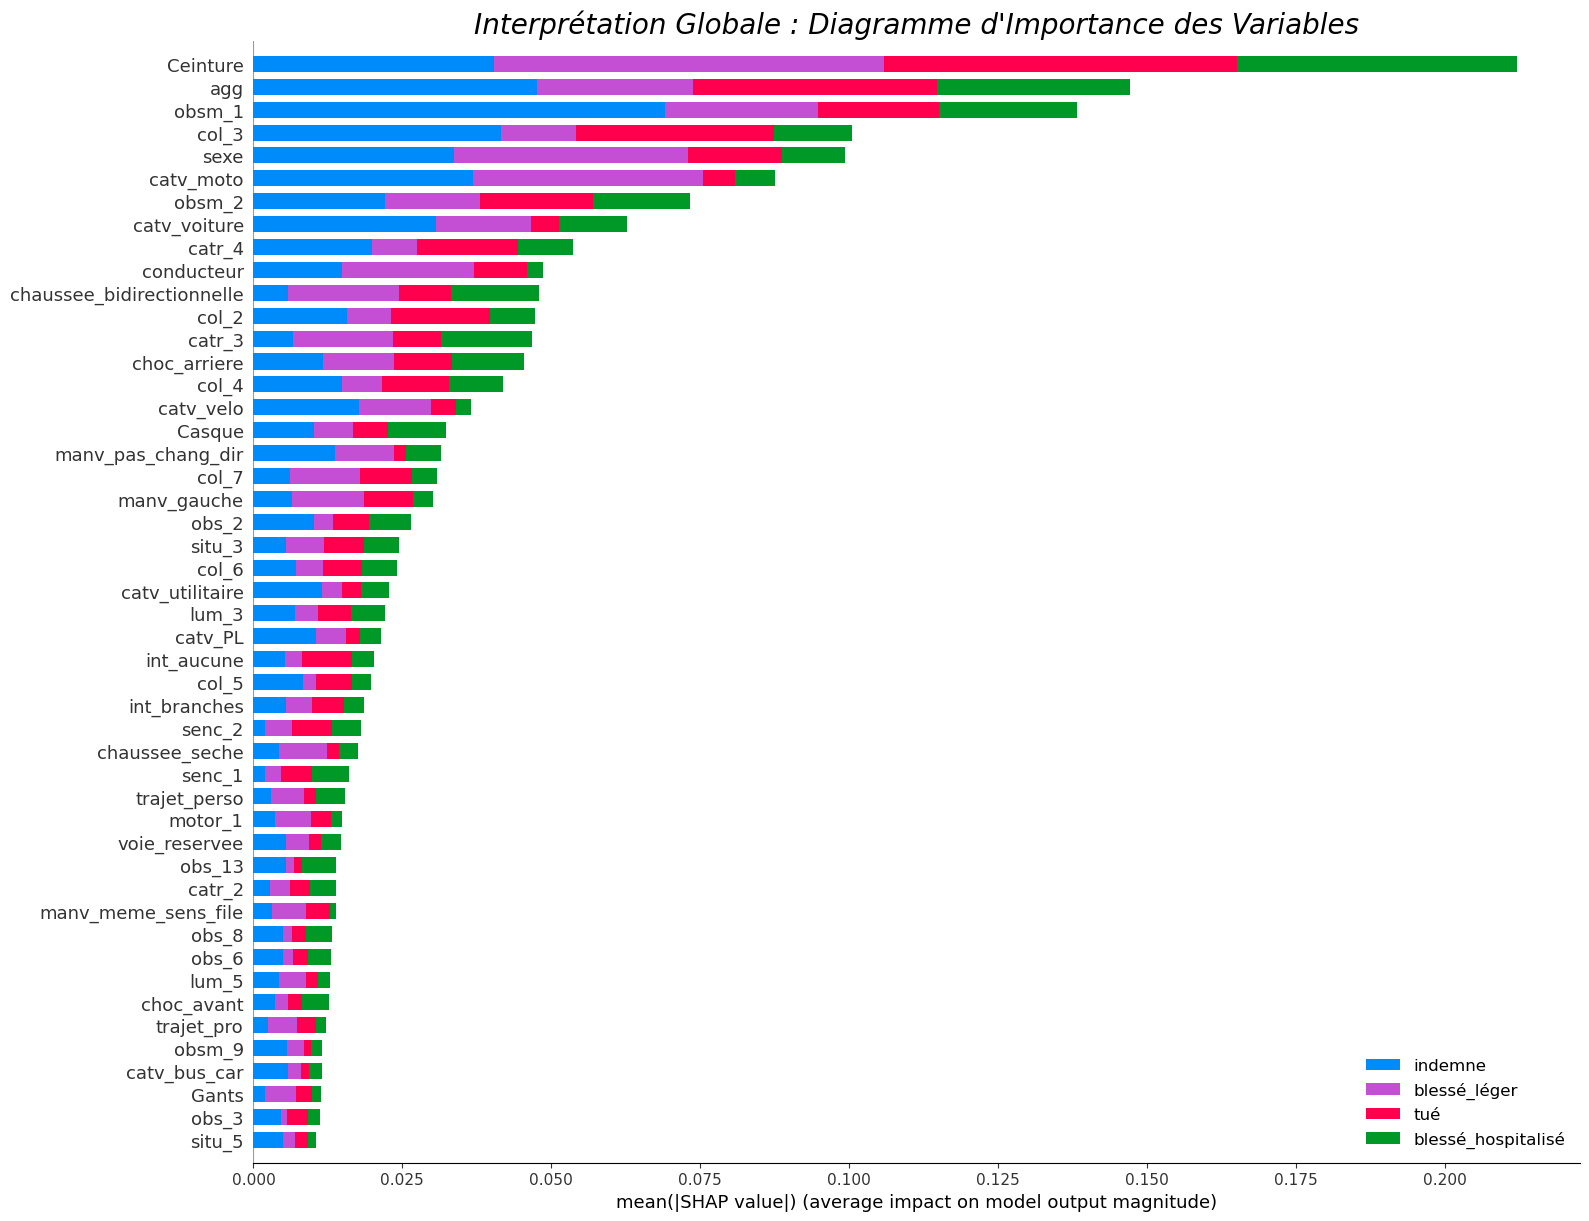

In [76]:
# visualisation de l'impact de chaque variables sur la prédiction
shap.summary_plot(shap_values,
                  X_test,
                  plot_type="bar",
                  class_names= target_names,
                  feature_names=feature_names,
                  plot_size=(16, 12),
                  max_display=48,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables", fontsize=20, fontstyle='italic')
plt.show();

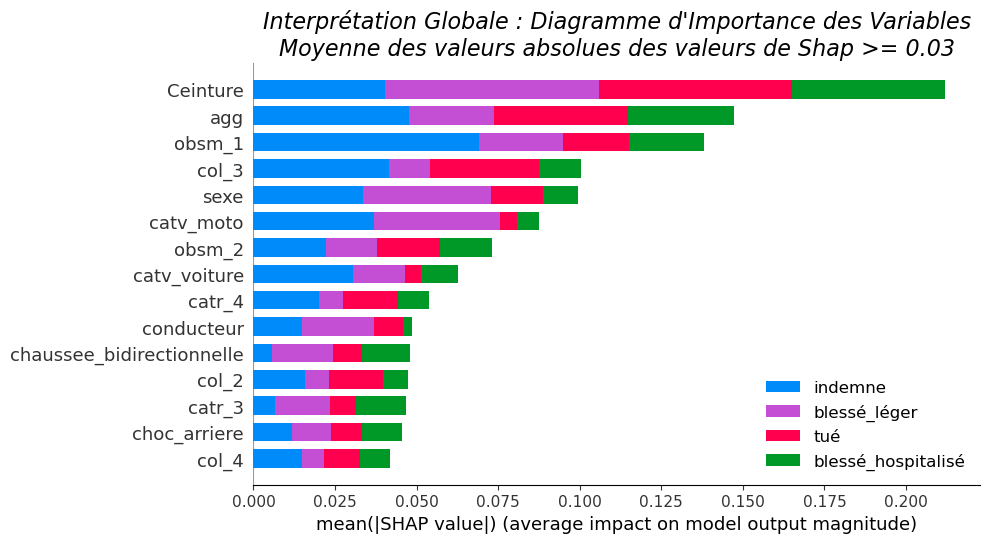

In [78]:
# Même graphique mais en ne sélectionnant que les variables les plus impactantes
shap.summary_plot(shap_values,
                  class_names= target_names,
                  feature_names=feature_names,
                  plot_size=(10, 5),
                  plot_type="bar",
                  max_display=15,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables\nMoyenne des valeurs absolues des valeurs de Shap >= 0.03", 
          fontsize=16, fontstyle='italic')
plt.show();

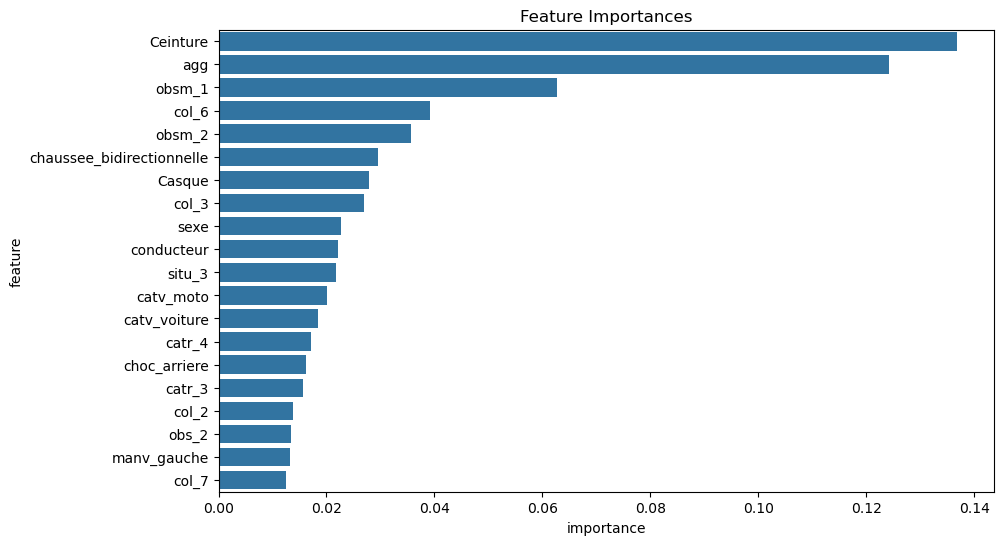

In [80]:
# On cherche les variables les plus importantes en utilisant la visualisation des arbres 
# Pour comparer avec les valeurs données par shap

importances = model.feature_importances_
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Feature Importances')
plt.show();

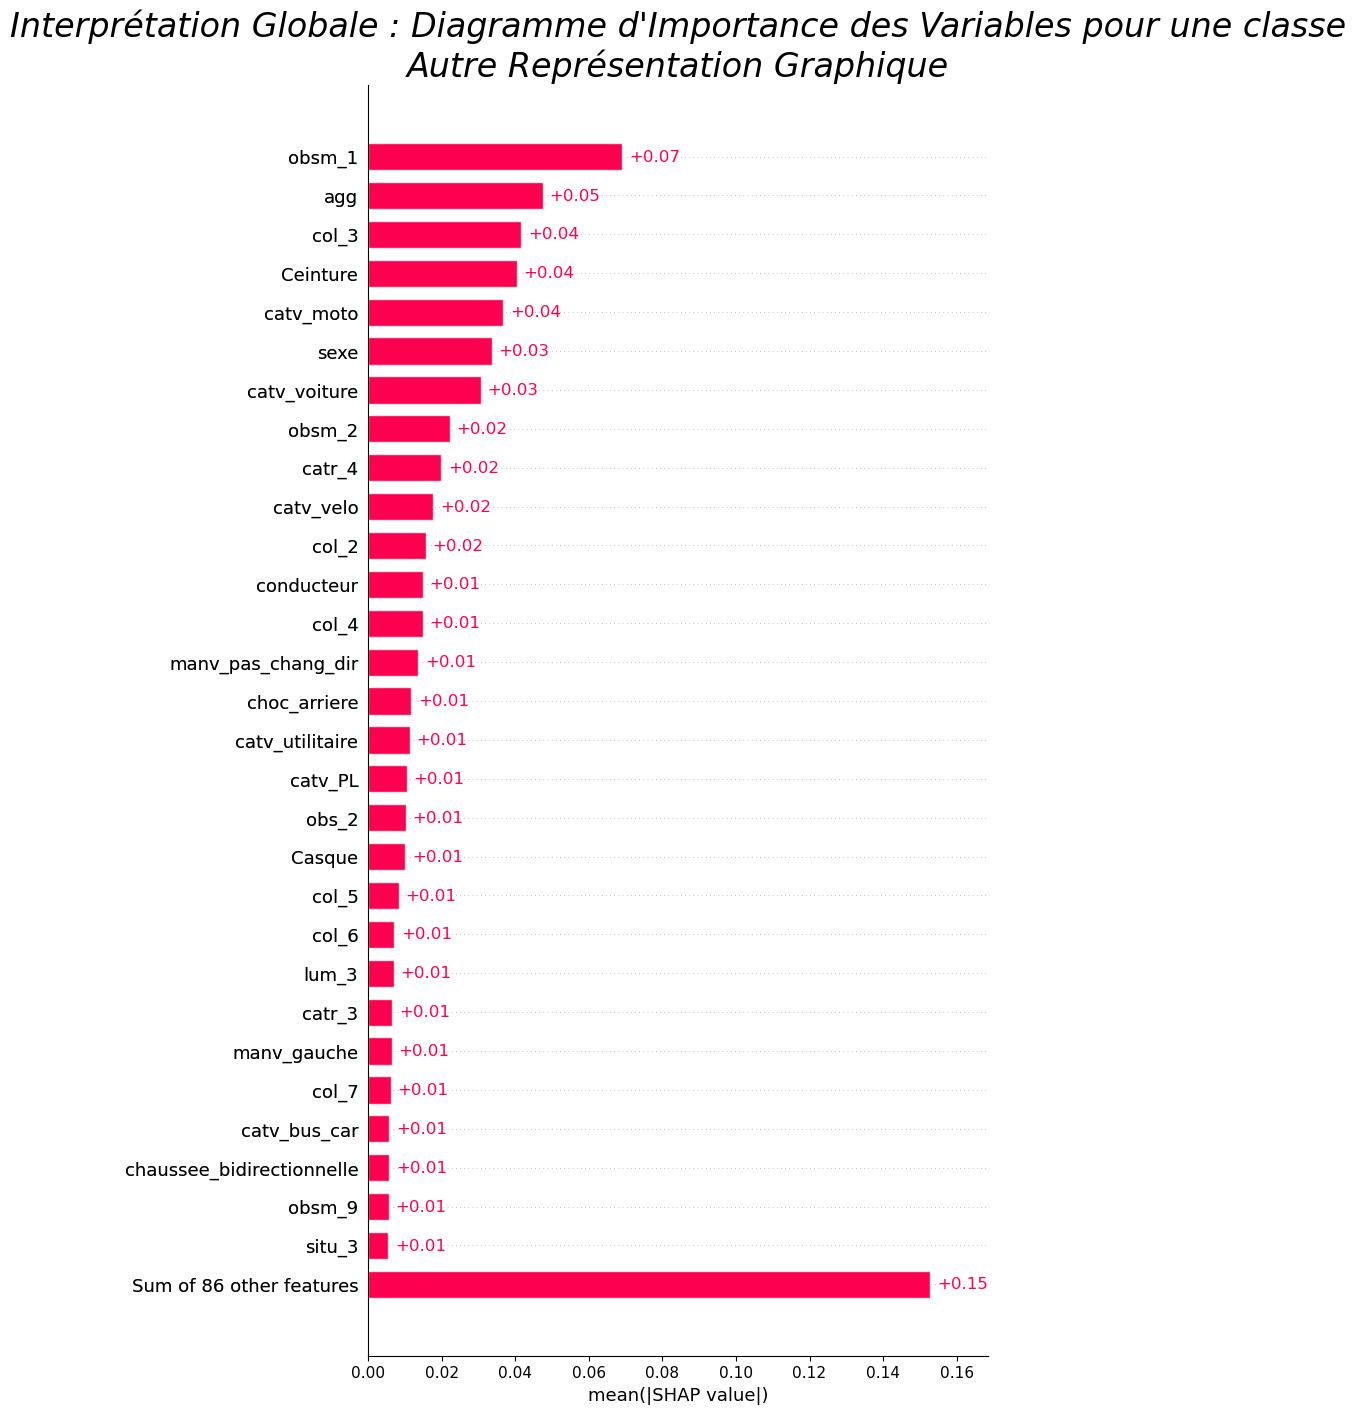

In [82]:
# Transformer les contributions marginales en un objet shap.Explanation pour pouvoir tracer un autre plot bar
class_of_interest = 0  # On choisit une classe
shap_explanation = shap.Explanation(values=shap_values[class_of_interest],
                                    data=X_test,
                                    feature_names=X_test.columns.tolist())

# On utilise l'objet Explanation pour le graphique
fig = plt.figure(figsize=(16, 10))
shap.plots.bar(shap_explanation, max_display=30, show=False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables pour une classe\nAutre Représentation Graphique", 
          fontsize=24, fontstyle='italic')
plt.show();


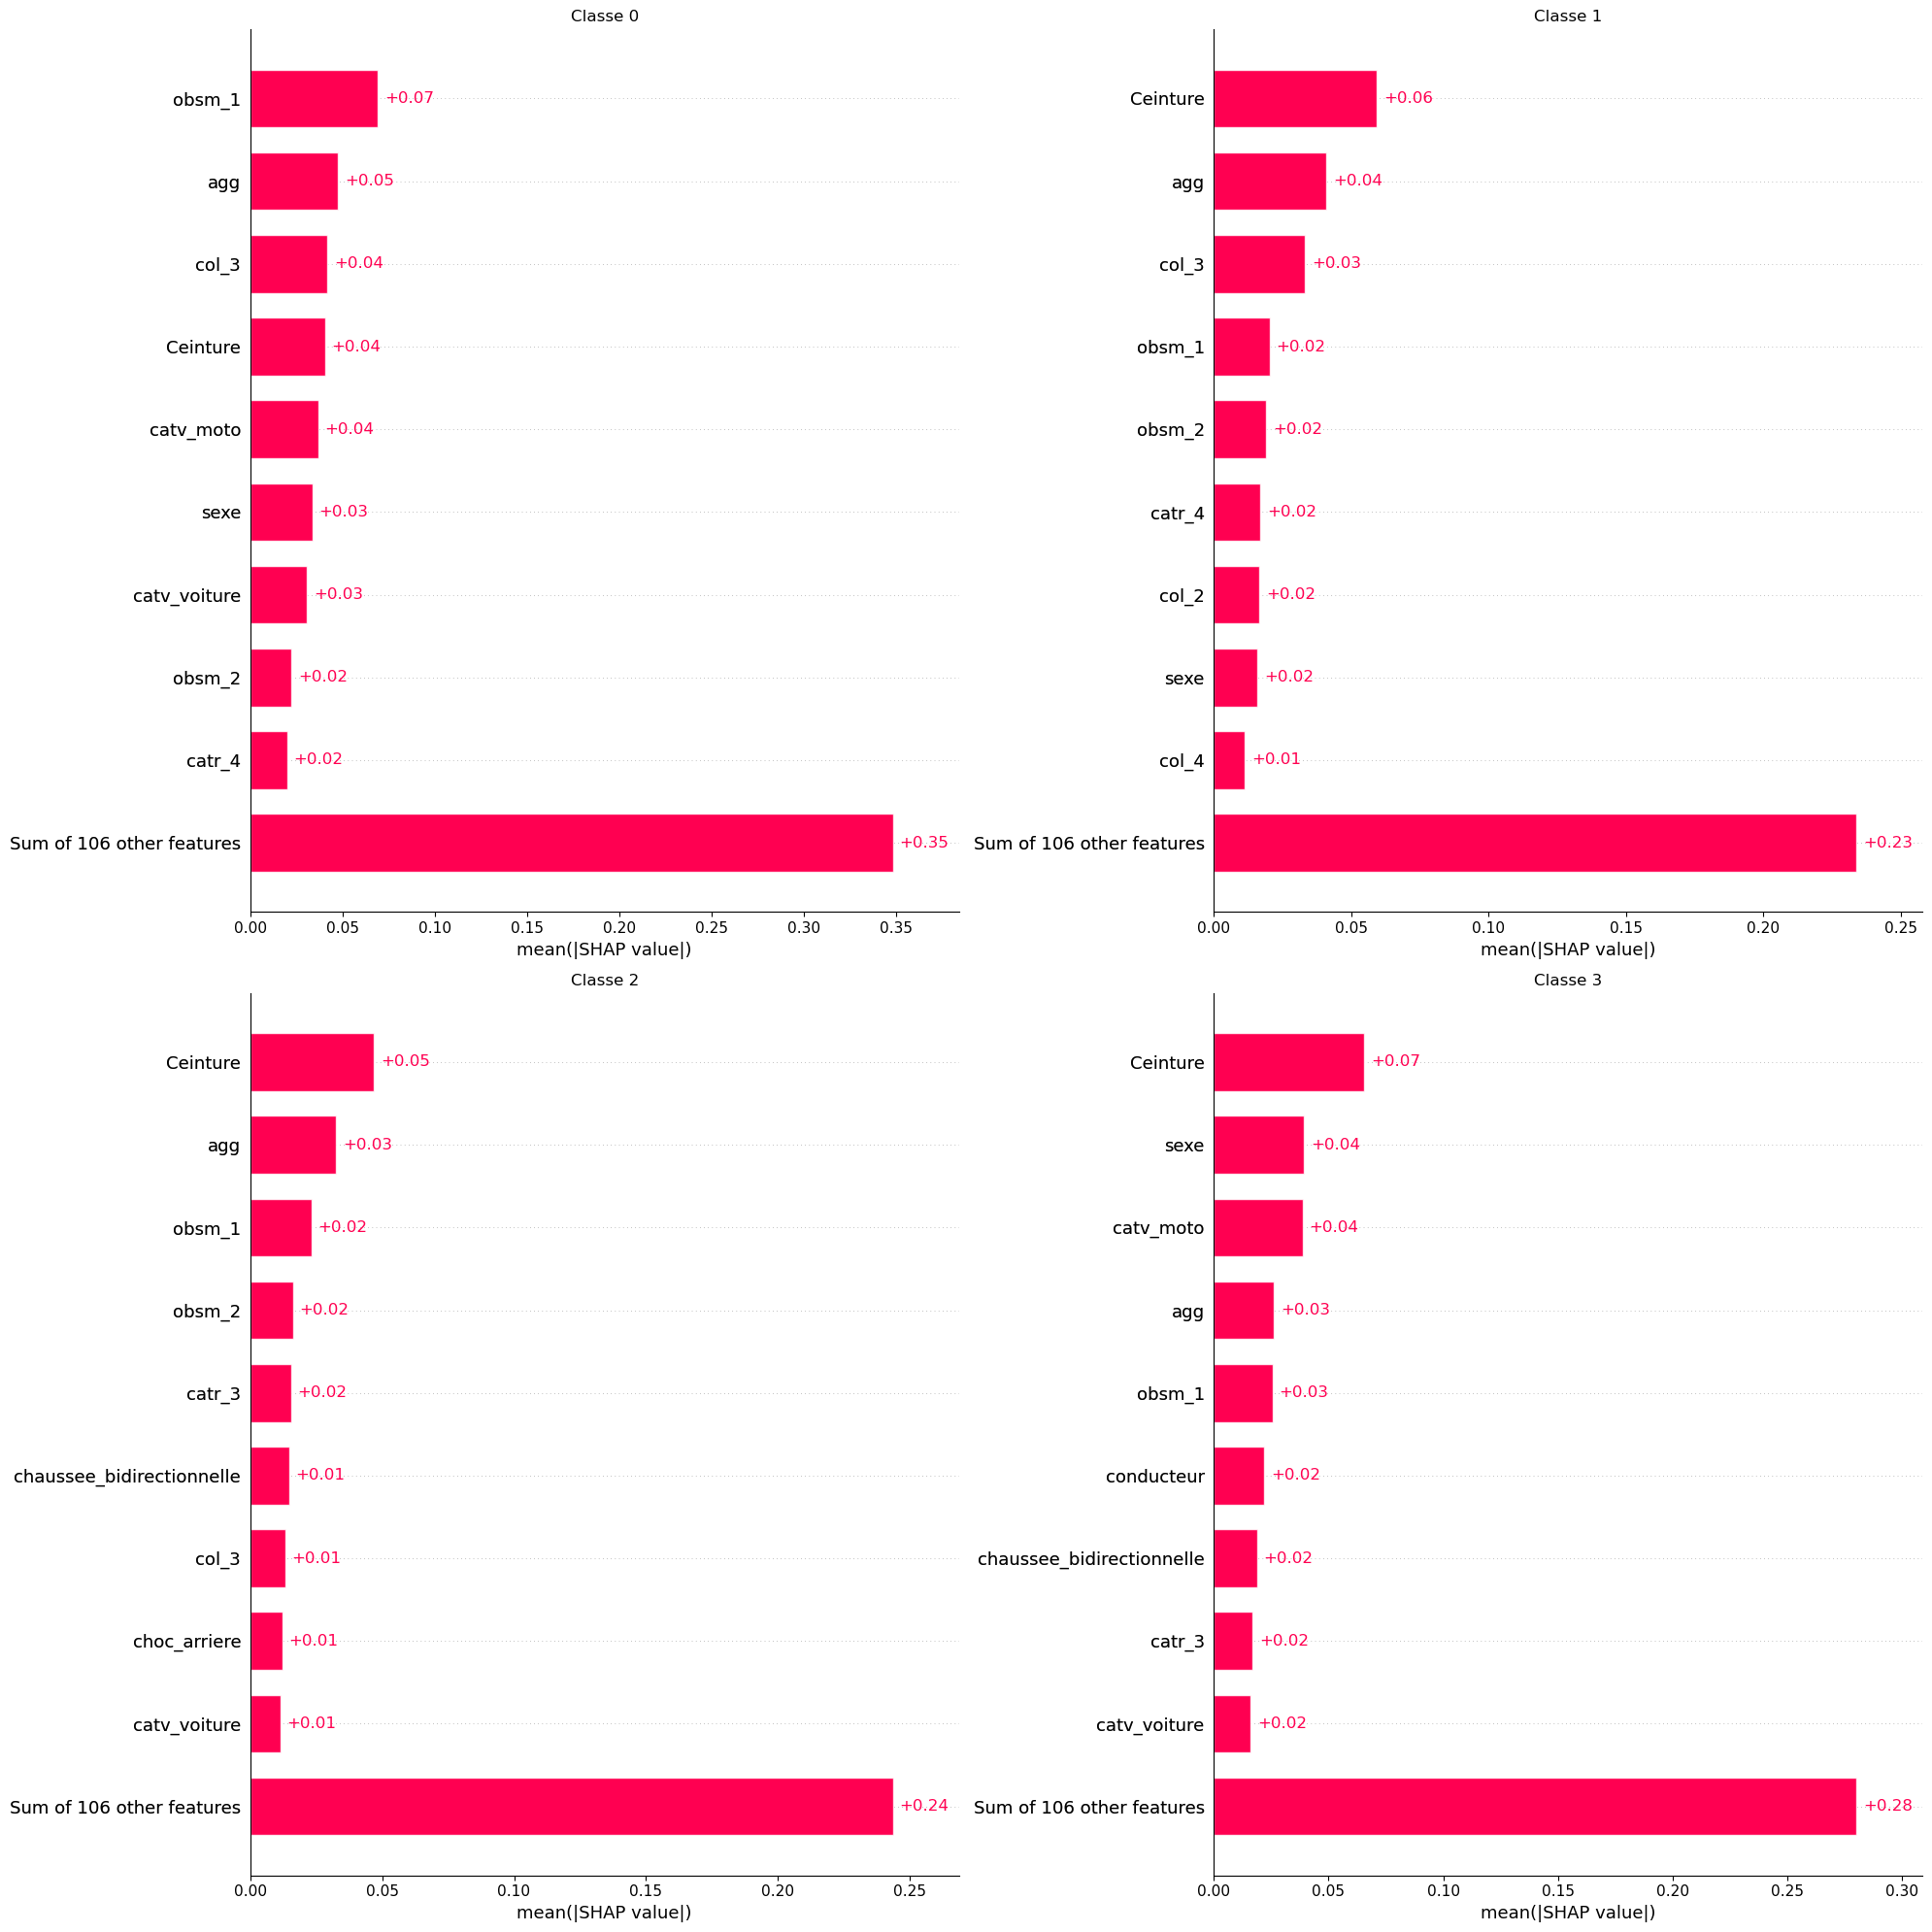

In [84]:
# On trace le même graphe pour les 4 classes 
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
for i in range(4):
    shap_explanation = shap.Explanation(values=shap_values[i],
                                        data=X_test,
                                        feature_names=X_test.columns.tolist())
    shap.plots.bar(shap_explanation, max_display=10, show=False, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f"Classe {i}")
plt.tight_layout()
plt.show();

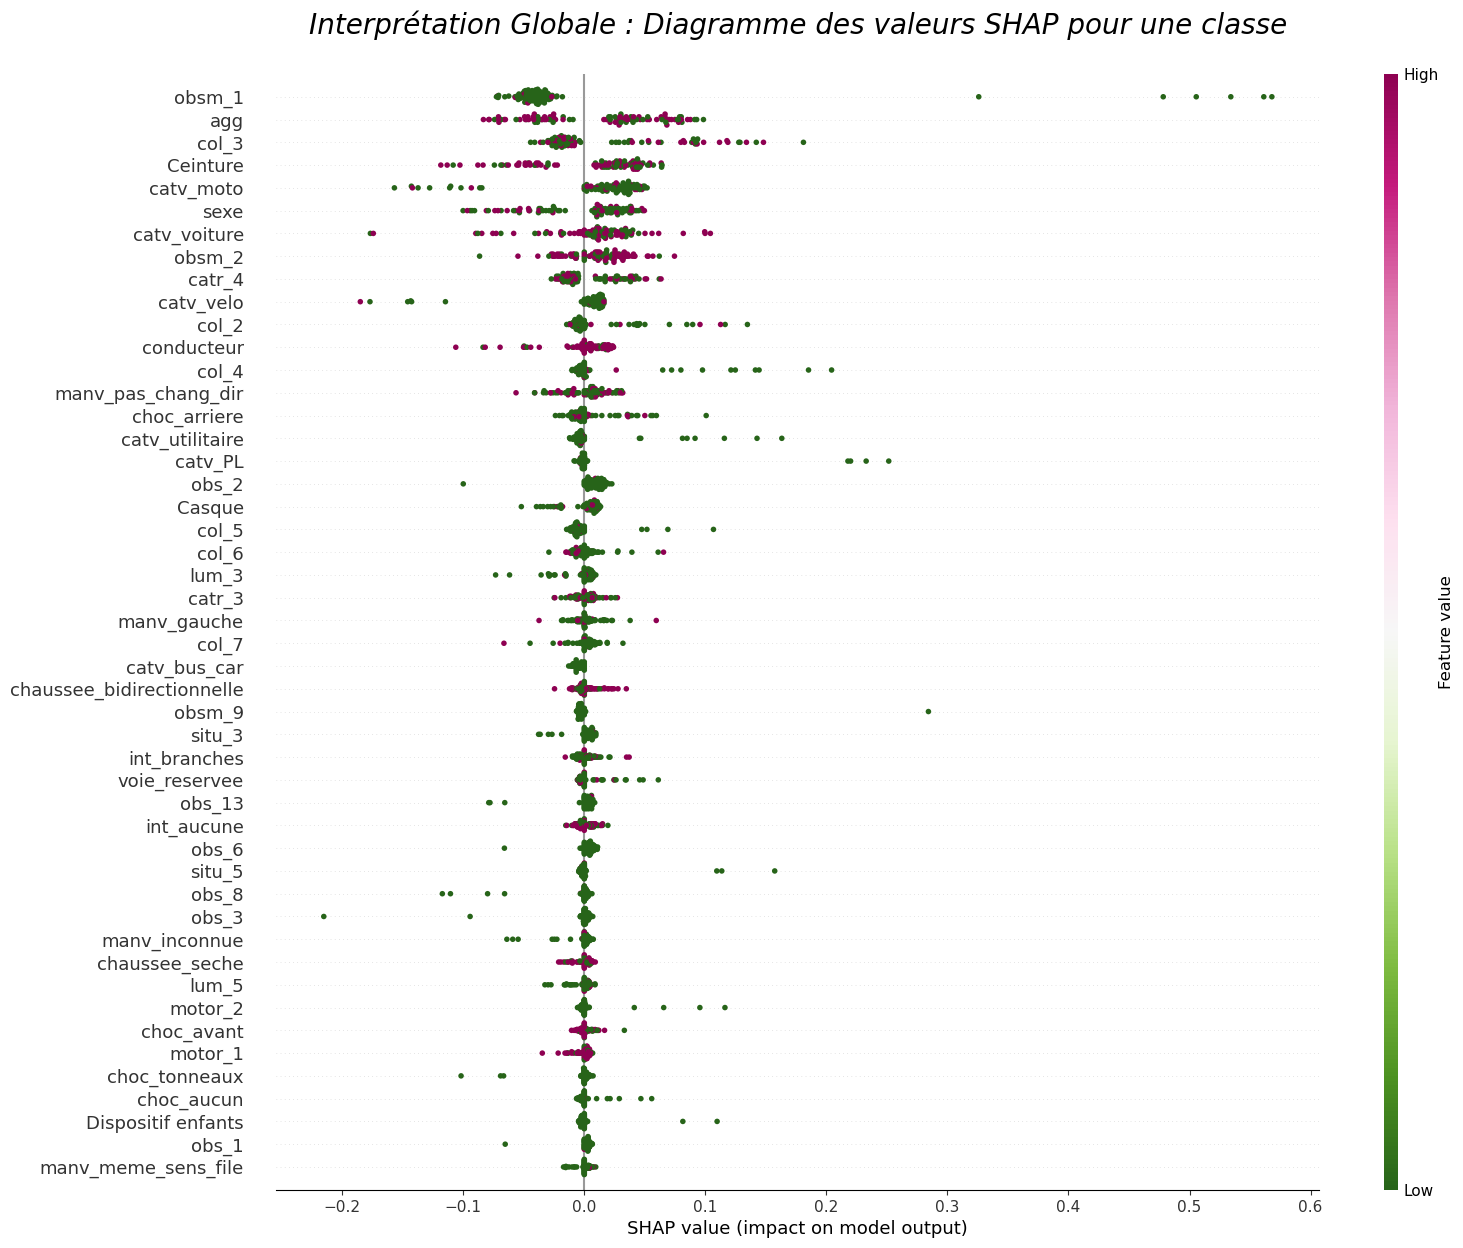

In [94]:
# print the JS visualization code to the notebook
# On trace un summary_plot pour une classe
shap.initjs()

shap.summary_plot(shap_values[0], 
                  features=X_test[:100],  # Même dimension que shap_values
                  feature_names=feature_names,
                  plot_size=(16, 12),
                  cmap='PiYG_r',
                  plot_type="dot",
                  max_display=48,
                  show = False)
plt.title("Interprétation Globale : Diagramme des valeurs SHAP pour une classe\n", 
          fontsize=20, fontstyle='italic')
plt.show();

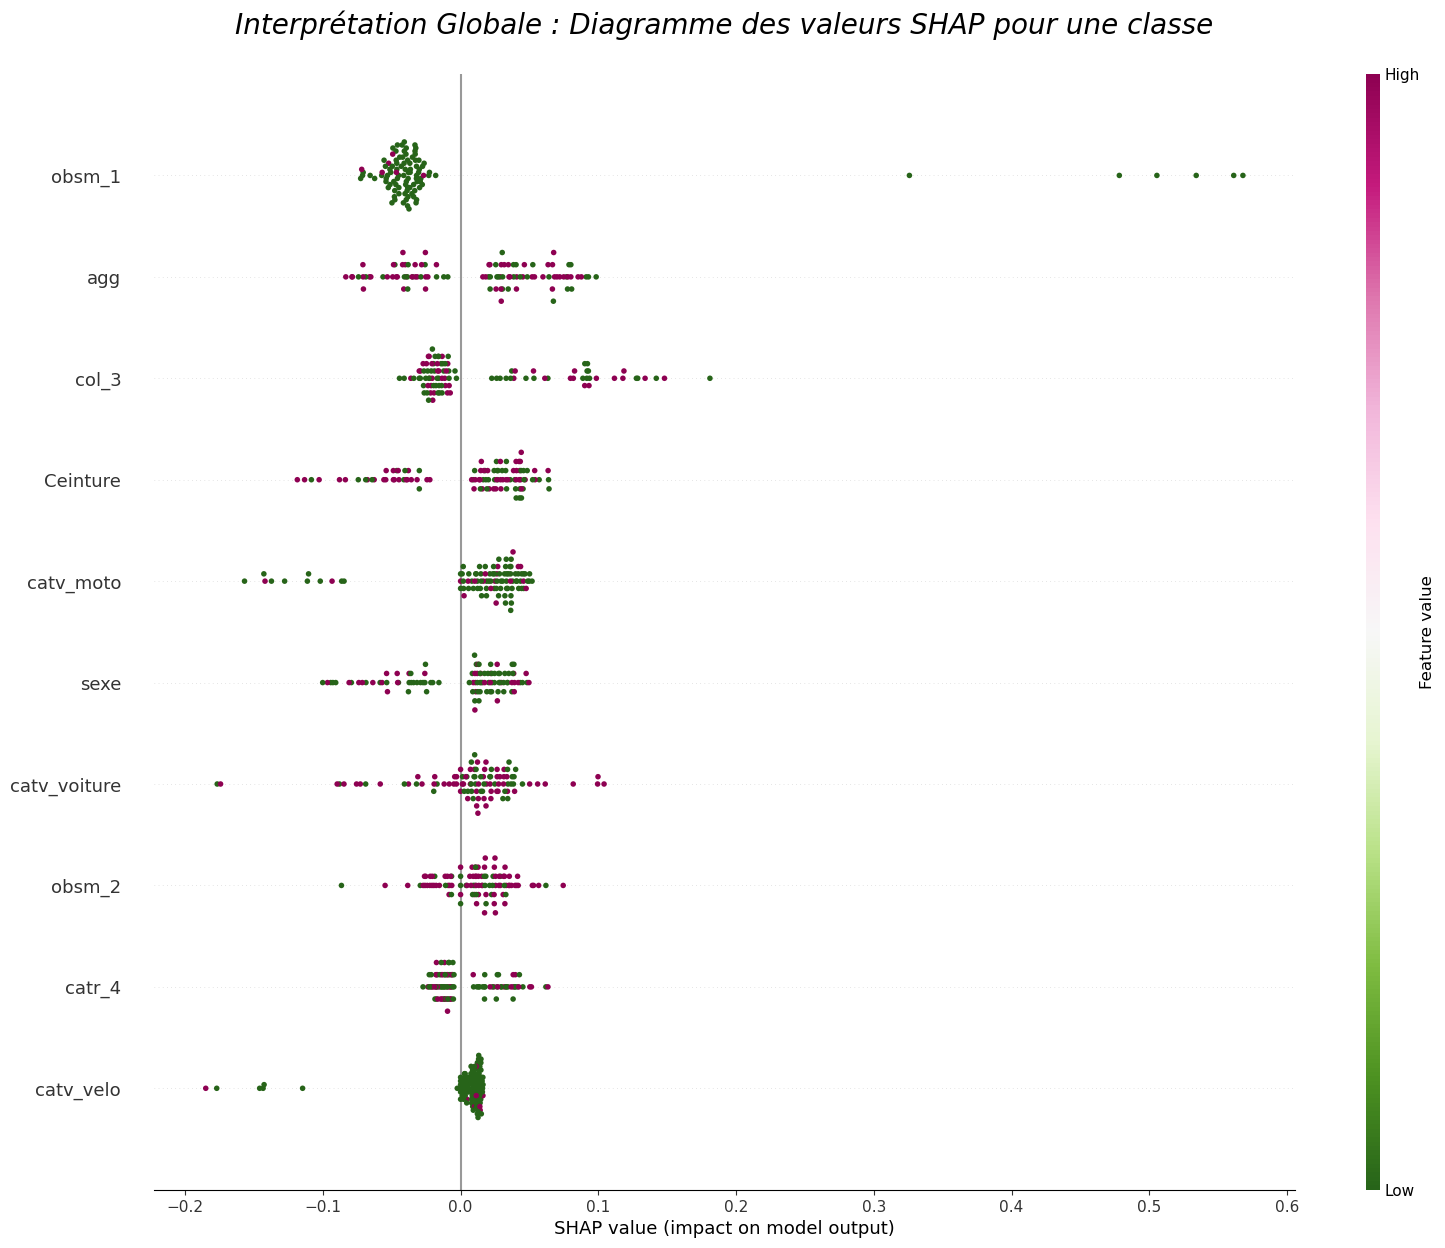

In [98]:
# print the JS visualization code to the notebook
# Même graphe en ne sélectionnant que les 10 premières variables
shap.initjs()

shap.summary_plot(shap_values[0], 
                  features=X_test[:100],  # Même dimension que shap_values
                  feature_names=feature_names,
                  plot_size=(16, 12),
                  cmap='PiYG_r',
                  plot_type="dot",
                  max_display=10,
                  show = False)
plt.title("Interprétation Globale : Diagramme des valeurs SHAP pour une classe\n", 
          fontsize=20, fontstyle='italic')
plt.show();

C:\Users\lancelot.delzant-dan\Anaconda3\lib\site-packages\shap\plots\_beeswarm.py:951: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\lancelot.delzant-dan\Anaconda3\lib\site-packages\shap\plots\_beeswarm.py:951: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\lancelot.delzant-dan\Anaconda3\lib\site-packages\shap\plots\_beeswarm.py:951: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\lancelot.delzant-dan\AppData\Local\Temp\ipykernel_6548\2840500664.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


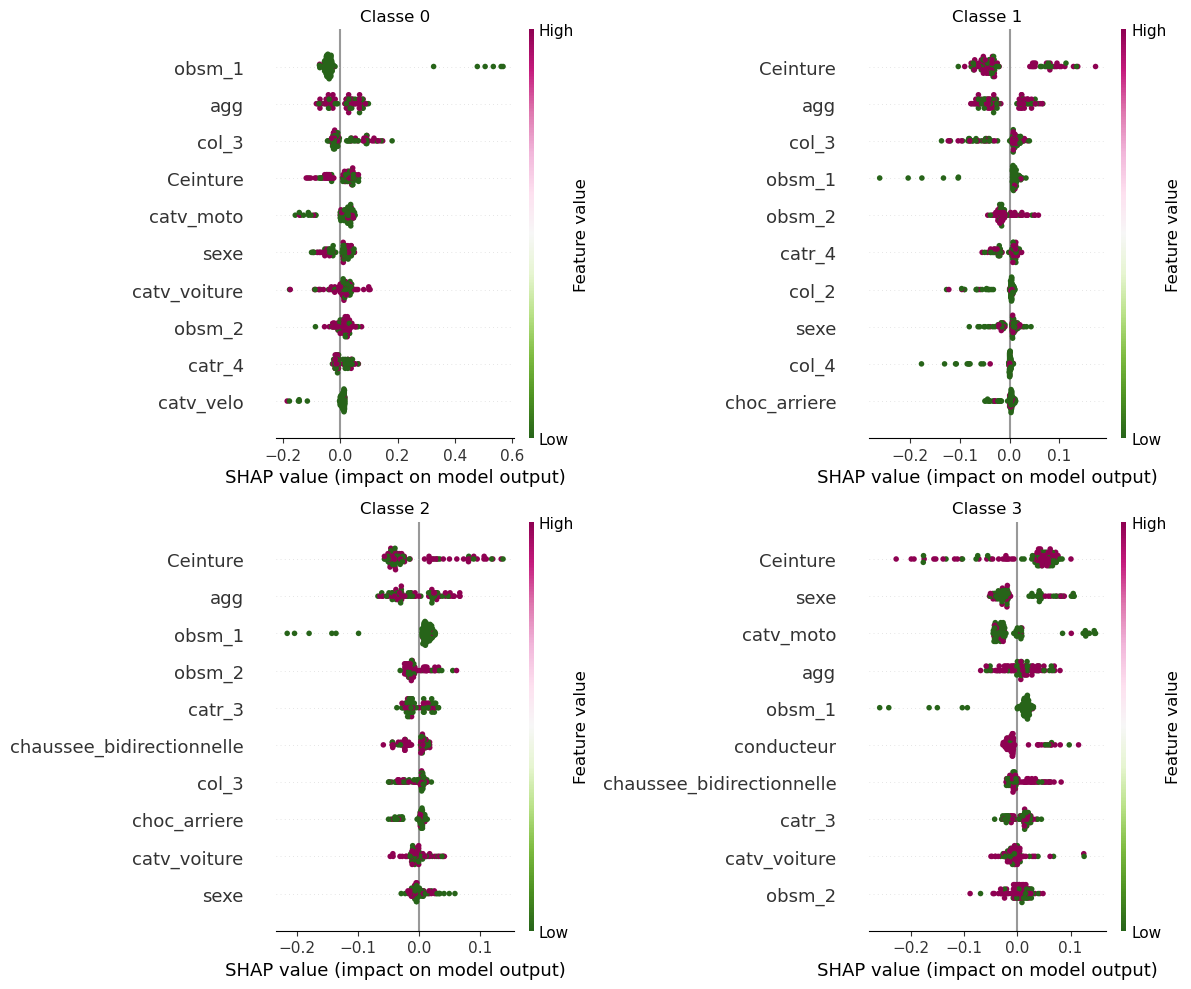

In [102]:
# On trace le graphe précédent pour nos 4 classes
shap.initjs()

fig, axs = plt.subplots(2, 2, figsize=(20, 20))
axs = axs.flatten()  # Aplatir le tableau 2D en 1D pour faciliter l'indexation

for i in range(4):
    plt.sca(axs[i])  # Définir l'axe courant
    shap.summary_plot(shap_values[i], 
                      features=X_test[:100],  # Même dimension que shap_values
                      feature_names=feature_names,
                      plot_size=(12, 10),
                      cmap='PiYG_r',
                      plot_type="dot",
                      max_display=10,
                      show=False)
    axs[i].set_title(f"Classe {i}")
plt.tight_layout()
plt.show();

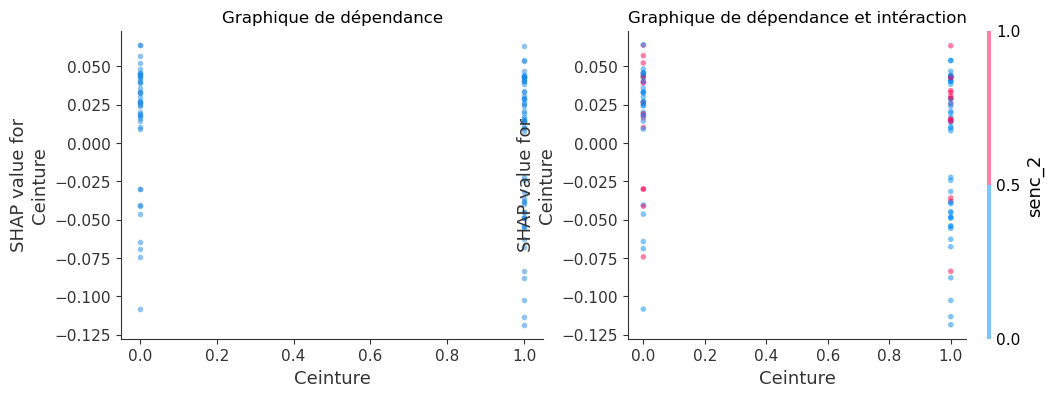

In [106]:
# On trace un graphe de dépendance pour une variable et une classe (exemple)
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("Ceinture", shap_values[0], X_test[:100],  # Même dimension que shap_values
                     interaction_index=None, alpha = 0.5,
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("Ceinture", shap_values[0], X_test[:100],  # Même dimension que shap_values 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.show();

#### Interprétation locale du modèle

In [108]:
# load JS visualization code to notebook
# On trace pour un usager son force plot
# Comme shap_values[idx] est un array à deux dimensions (100, 115), on obtient un stacked force plot pour la classe idx
shap.initjs()

idx = 2  # Classe sélectionnée

shap.force_plot(explainer.expected_value[idx], 
                shap_values[idx],
                X_test,
                figsize=(20, 8),
                ordering_keys=True,
                text_rotation=0)

Le gstacked force plot est particulièrement utile pour examiner les cas mal classés et obtenir des informations sur les facteurs à l’origine de ces erreurs de classification. Cela permet une compréhension plus approfondie du processus de prise de décision du modèle et aide à identifier les domaines qui nécessitent une étude plus approfondie ou une amélioration.

Il reste cependant difficile à interpréter et nécessite donc beaucoup de temps de compréhension

In [110]:
# On trace pour un usager son force plot en considérant une seule classe cette fois-ci (shap_values en 1D array)
shap.initjs()

idx = 2
print("Usager numero : ", X_test.index[idx])
print("Model Prediction : Classe", y_pred[idx])
print("Classe Réelle de l'usager :", y_test.loc[idx])
print("__"*40)

shap.force_plot(explainer.expected_value[idx], 
                shap_values[0][idx],
                X_test.iloc[idx,:],
                figsize=(20, 8),
                ordering_keys=True,
                text_rotation=0)

Usager numero :  228673
Model Prediction : Classe 2
Classe Réelle de l'usager : 4
________________________________________________________________________________


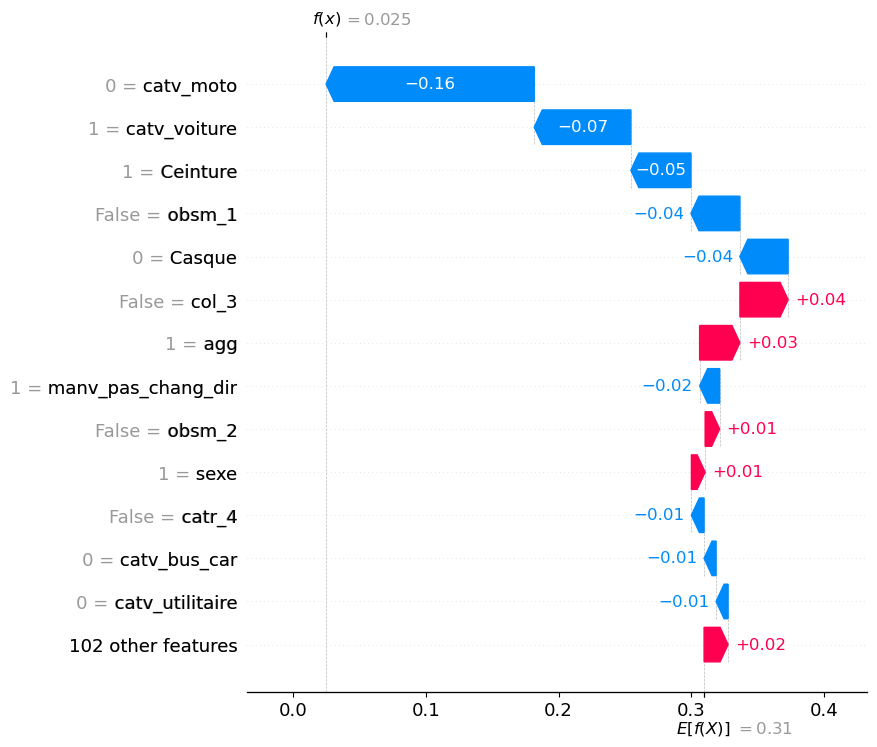

In [112]:
# On crée le graphique waterfall_plot pour un usager et une classe

class_of_interest = 0  # On choisit une classe
idx = 2  # usager qu'on veut
shap_exp = shap.Explanation(values=shap_values[class_of_interest][idx],
                            base_values=explainer.expected_value[class_of_interest],
                            data=X_test.iloc[idx,:],
                            feature_names=X_test.columns.tolist())

shap.waterfall_plot(shap_exp, max_display=14)

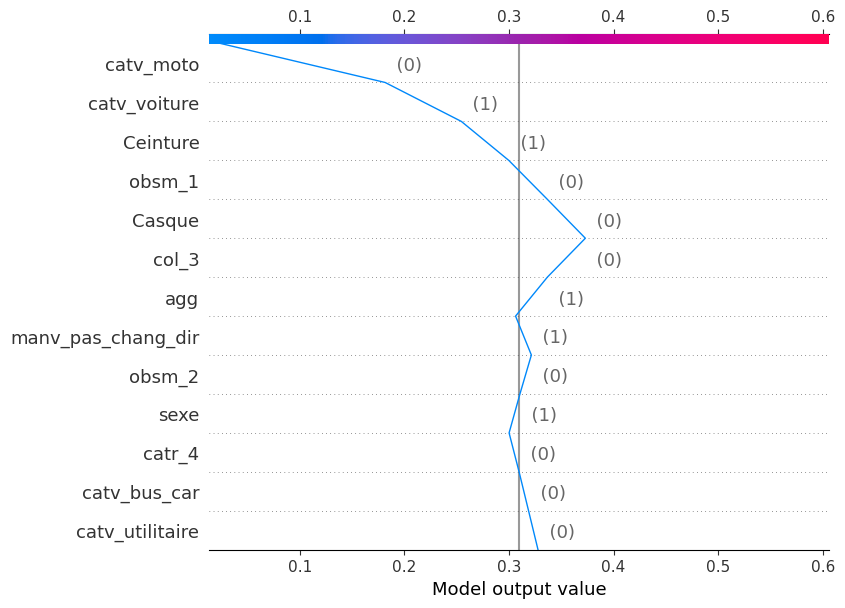

In [114]:
# On crée le graphique decision_plot pour un usager et une classe

class_of_interest = 0  # On choisit une classe
idx = 2  # usager qu'on veut

shap.decision_plot(explainer.expected_value[class_of_interest], 
                   shap_values[class_of_interest][idx], 
                   X_test.iloc[idx,:], 
                   feature_names=X_test.columns.to_list(),
                   feature_order='importance',
                   feature_display_range=slice(None, -14, -1))